In [4]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt

# load the 2019 data we need
drug_q1 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q1/ascii/DRUG19Q1.txt", sep="$", encoding="latin1")
reac_q1 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q1/ascii/INDI19Q1.txt", sep="$", encoding="latin1")
drug_q2 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q2/ascii/DRUG19Q2.txt", sep="$", encoding="latin1")
reac_q2 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q2/ascii/INDI19Q2.txt", sep="$", encoding="latin1")
drug_q3 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q3/ascii/DRUG19Q3.txt", sep="$", encoding="latin1")
reac_q3 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q3/ascii/INDI19Q3.txt", sep="$", encoding="latin1")
drug_q4 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q4/ascii/DRUG19Q4.txt", sep="$", encoding="latin1")
reac_q4 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q4/ascii/INDI19Q4.txt", sep="$", encoding="latin1")


/tmp/ipykernel_749/141997024.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_q1 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q1/ascii/DRUG19Q1.txt", sep="$", encoding="latin1")
/tmp/ipykernel_749/141997024.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_q2 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q2/ascii/DRUG19Q2.txt", sep="$", encoding="latin1")
/tmp/ipykernel_749/141997024.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_q3 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q3/ascii/DRUG19Q3.txt", sep="$", encoding="latin1")
/tmp/ipykernel_749/141997024.py:11: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_q4 = pd.read_csv("/kaggle/input/faers-2019/faers_ascii_2019Q4/ascii/DRUG19Q4.txt", sep="$", en

In [5]:
data_q1 = drug_q1.merge(reac_q1, on = "primaryid", how = "outer" ).drop_duplicates()
data_q2 = drug_q2.merge(reac_q2, on = "primaryid", how = "outer" ).drop_duplicates()
data_q3 = drug_q3.merge(reac_q3, on = "primaryid", how = "outer" ).drop_duplicates()
data_q4 = drug_q4.merge(reac_q4, on = "primaryid", how = "outer" ).drop_duplicates()

In [6]:
data_q1_tramal = data_q1[data_q1["drugname"].str.lower() == "tramal"]
data_q2_tramal = data_q2[data_q2["drugname"].str.lower() == "tramal"]
data_q3_tramal = data_q3[data_q3["drugname"].str.lower() == "tramal"]
data_q4_tramal = data_q4[data_q4["drugname"].str.lower() == "tramal"]

In [7]:
data_tramal = pd.concat([data_q1_tramal, data_q2_tramal, data_q3_tramal, data_q4_tramal], axis = 0).drop_duplicates()
data_tramal.head()

,primaryid,caseid_x,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,...,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid_y,indi_drug_seq,indi_pt
75553,109822347,10982234,41,C,TRAMAL,TRAMADOL,1,Unknown,20 DROPS AS REQUIRED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10982234.0,1.0,Colorectal cancer metastatic
75554,109822347,10982234,41,C,TRAMAL,TRAMADOL,1,Unknown,20 DROPS AS REQUIRED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10982234.0,2.0,Colorectal cancer
75555,109822347,10982234,41,C,TRAMAL,TRAMADOL,1,Unknown,20 DROPS AS REQUIRED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10982234.0,3.0,Muscle spasms
75556,109822347,10982234,41,C,TRAMAL,TRAMADOL,1,Unknown,20 DROPS AS REQUIRED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10982234.0,5.0,Colorectal cancer
75557,109822347,10982234,41,C,TRAMAL,TRAMADOL,1,Unknown,20 DROPS AS REQUIRED,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10982234.0,12.0,Colorectal cancer


In [8]:
# Extract adverse effects
adverse_effects_tramal = data_tramal['indi_pt'].value_counts()
adverse_effects_tramal.head(10)

Product used for unknown indication    3151
Prophylaxis                             316
Pain                                    262
Hypertension                            156
Coronary artery disease                 152
Pulmonary arterial hypertension         141
Premedication                           131
Seizure                                 123
Rheumatoid arthritis                    105
Plasma cell myeloma                      93
Name: indi_pt, dtype: int64

In [28]:
top_10_adverse_effects_tramal = adverse_effects_tramal.drop("Product used for unknown indication").head(10).sort_values(ascending = True)
top_10_adverse_effects_tramal

Non-small cell lung cancer          72
Plasma cell myeloma                 93
Rheumatoid arthritis               105
Seizure                            123
Premedication                      131
Pulmonary arterial hypertension    141
Coronary artery disease            152
Hypertension                       156
Pain                               262
Prophylaxis                        316
Name: indi_pt, dtype: int64

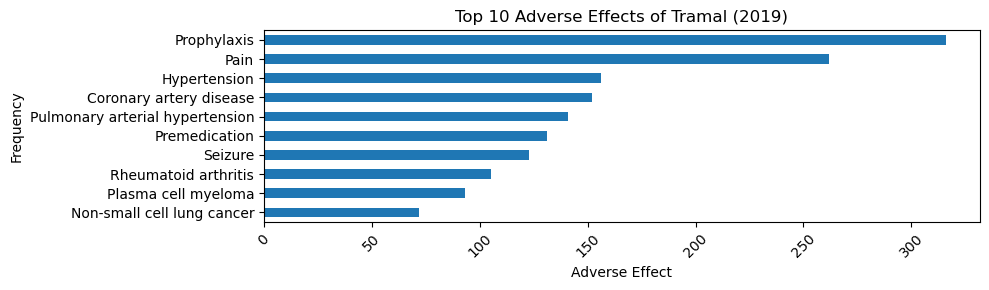

In [36]:
plt.figure(figsize=(10, 3))
top_10_adverse_effects_tramal.plot(kind='barh')
plt.title('Top 10 Adverse Effects of Tramal (2019)')
plt.xlabel('Adverse Effect')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
data_q1_lyrica = data_q1[data_q1["drugname"].str.lower() == "lyrica"]
data_q2_lyrica = data_q2[data_q2["drugname"].str.lower() == "lyrica"]
data_q3_lyrica = data_q3[data_q3["drugname"].str.lower() == "lyrica"]
data_q4_lyrica = data_q4[data_q4["drugname"].str.lower() == "lyrica"]

In [31]:
data_lyrica = pd.concat([data_q1_lyrica, data_q2_lyrica, data_q3_lyrica, data_q4_lyrica], axis = 0).drop_duplicates()
data_lyrica.head()

,primaryid,caseid_x,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,...,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid_y,indi_drug_seq,indi_pt
435,100244892,10024489,1,PS,LYRICA,PREGABALIN,1,Oral,UNK,NaN,...,NaN,NaN,21446.0,NaN,NaN,"CAPSULE, HARD",NaN,10024489.0,1.0,Neuropathy peripheral
436,100244892,10024489,1,PS,LYRICA,PREGABALIN,1,Oral,UNK,NaN,...,NaN,NaN,21446.0,NaN,NaN,"CAPSULE, HARD",NaN,10024489.0,2.0,Muscle spasms
437,100244892,10024489,1,PS,LYRICA,PREGABALIN,1,Oral,UNK,NaN,...,NaN,NaN,21446.0,NaN,NaN,"CAPSULE, HARD",NaN,10024489.0,3.0,Pain
438,100244892,10024489,1,PS,LYRICA,PREGABALIN,1,Oral,UNK,NaN,...,NaN,NaN,21446.0,NaN,NaN,"CAPSULE, HARD",NaN,10024489.0,6.0,Pain
439,100244892,10024489,2,SS,LYRICA,PREGABALIN,1,Oral,"200 MG, 3X/DAY",NaN,...,NaN,NaN,21446.0,200.0,MG,"CAPSULE, HARD",TID,10024489.0,1.0,Neuropathy peripheral


In [32]:
# Extract adverse effects
adverse_effects_lyrica = data_lyrica['indi_pt'].value_counts()
adverse_effects_lyrica.head(10)

Product used for unknown indication    77044
Pain                                   19366
Neuropathy peripheral                  14195
Fibromyalgia                           11865
Neuralgia                              10195
Rheumatoid arthritis                    9909
Gastrooesophageal reflux disease        7304
Hypertension                            6060
Diabetes mellitus                       5372
Diabetic neuropathy                     5285
Name: indi_pt, dtype: int64

In [33]:
top_10_adverse_effects_lyrica = adverse_effects_lyrica.drop("Product used for unknown indication").head(10).sort_values(ascending = True)
top_10_adverse_effects_lyrica

Back pain                            5052
Diabetic neuropathy                  5285
Diabetes mellitus                    5372
Hypertension                         6060
Gastrooesophageal reflux disease     7304
Rheumatoid arthritis                 9909
Neuralgia                           10195
Fibromyalgia                        11865
Neuropathy peripheral               14195
Pain                                19366
Name: indi_pt, dtype: int64

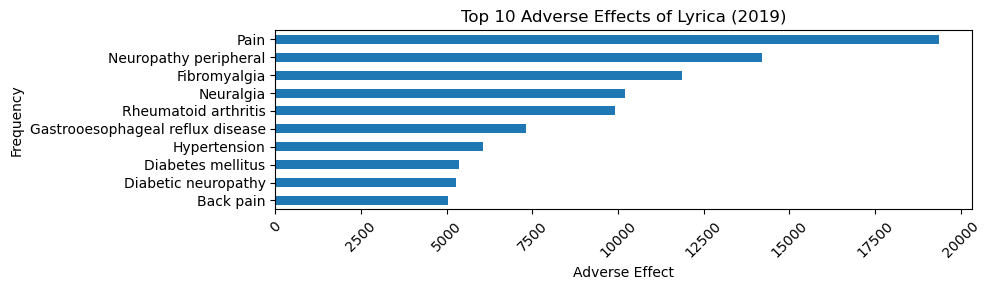

In [37]:
plt.figure(figsize=(10, 3))
top_10_adverse_effects_lyrica.plot(kind='barh')
plt.title('Top 10 Adverse Effects of Lyrica (2019)')
plt.xlabel('Adverse Effect')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()